## Ankita Mandal
## Domain : Data Science and Business Analytics
## GRIP September'22
## The Sparks Foundation



<h1 style="color:#800000;">Task 6 - Prediction using Decision Tree</h1>

In [1]:
# Importing multiple libraries to read, analyze and visualization of the dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Iris.csv file

Iris_data = pd.read_csv('Iris.csv')

In [3]:
# some basic inforfation of dataset

Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<p style="color:#808000>Iris dataset contains total 6 features in which 4 are independent features
('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm') and 1 features(Species)
is dependent or target variable.</p>

Iris_data contain total 6 features in which 4 features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable.

In [4]:
# Checking top 10 records of dataset
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# Basic numerical info about data for each numeric feature...

Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Data points count value for each class labels..

Iris_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
# removing unneeded column

Iris_data.drop('Id',axis=1, inplace=True)

In [8]:
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualizing Iris Data

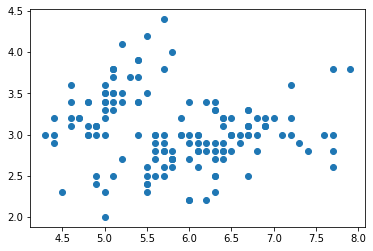

In [9]:
plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.show()

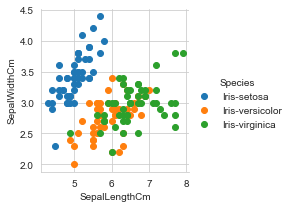

In [10]:
# visualize 2 features based on target variable
sns.set_style('whitegrid')
sns.FacetGrid(Iris_data, hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

plt.show()


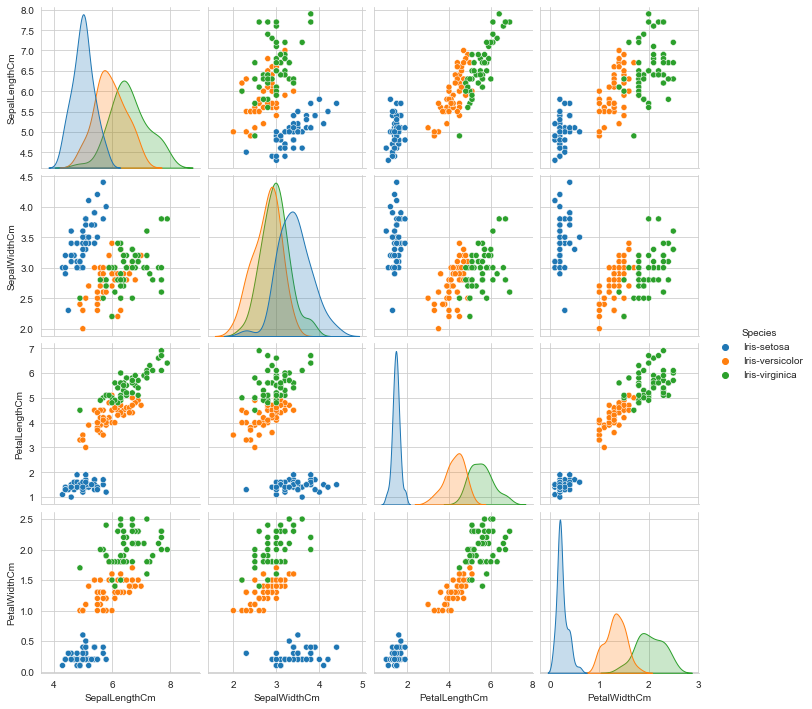

In [11]:
# relationship between all features distribution with each other

sns.pairplot(Iris_data, hue='Species')
plt.show()

In [12]:
# Here we can observe that all the blue points are seperated with other two classes.
# But Versicolor and Verginica are partially overlapping with each other.

As we can see that Petal Features are givinga better cluster division compared
to the Sepal features. This is an indication that Petals can help in better and accurate
predictions over the Sepal.

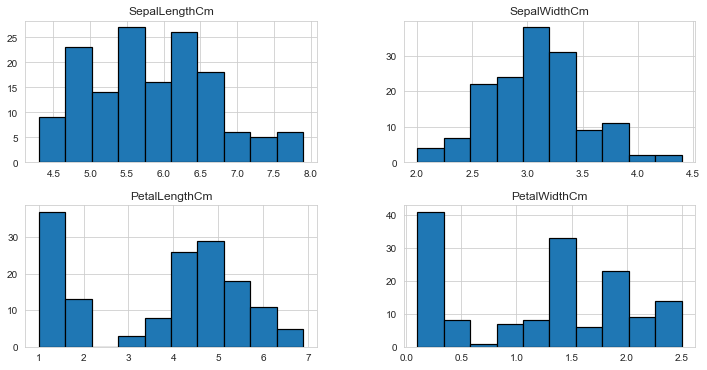

In [13]:
# How are the length and width are distributed

Iris_data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

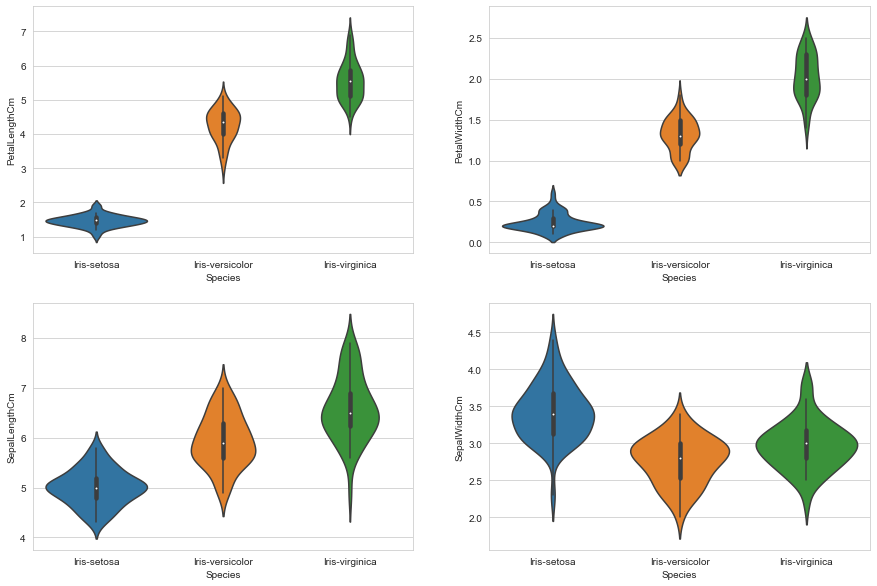

In [14]:
# How length and width vary according to the species

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=Iris_data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=Iris_data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=Iris_data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=Iris_data)


In the above violinplot the thinner part denotes that there is less density
where as there fatter part conveys higher density.

### Exploring some new features

In [15]:
Iris_data['Sepal_diff'] = Iris_data['SepalLengthCm'] - Iris_data['SepalWidthCm']
Iris_data['petal_diff'] = Iris_data['PetalLengthCm'] - Iris_data['PetalWidthCm']

In [16]:
Iris_data['Sepal_petal_len_diff'] = Iris_data['SepalLengthCm'] - Iris_data['PetalLengthCm']
Iris_data['Sepal_petal_wid_diff'] = Iris_data['SepalWidthCm'] - Iris_data['PetalWidthCm']
Iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_wid_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1


In [17]:
Iris_data['Sepal_petal_len_wid_diff'] = Iris_data['SepalLengthCm'] - Iris_data['PetalLengthCm']
Iris_data['Sepal_petal_wid_len_diff'] = Iris_data['SepalWidthCm'] - Iris_data['PetalWidthCm']
Iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_wid_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,3.7,3.3
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,3.5,2.8
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,3.4,3.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,3.1,2.9
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,1.5,0.7
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,1.3,0.6
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,1.3,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,0.8,1.1


#### Now finding relationship b/w new feature based on class labels using pair plot.

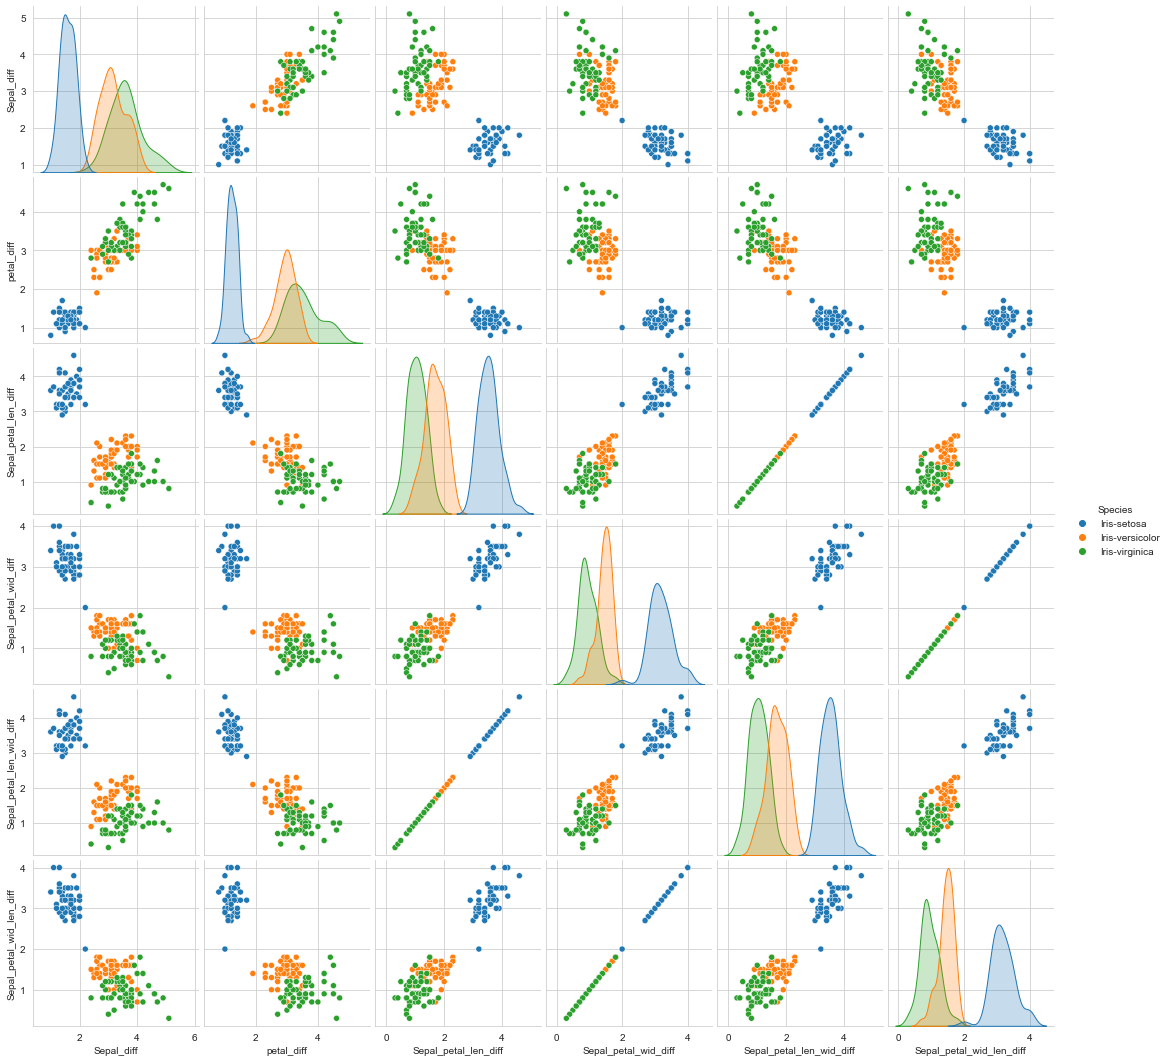

In [18]:
sns.pairplot(Iris_data[['Species','Sepal_diff','petal_diff','Sepal_petal_len_diff','Sepal_petal_wid_diff','Sepal_petal_len_wid_diff','Sepal_petal_wid_len_diff']], hue='Species')

plt.show()

With the help of pair plot we are getting some new information but it is more likely similar
with our main data features as we saw earlier.
Every combination well seperate the Iris-setosa but has some overlapped between Versicolor and Virginica.

## Building Classification Model

In [19]:
# Importing few library for create Decision Tree classifier and visualizing the tree structure

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
import graphviz

### Correlation matrix

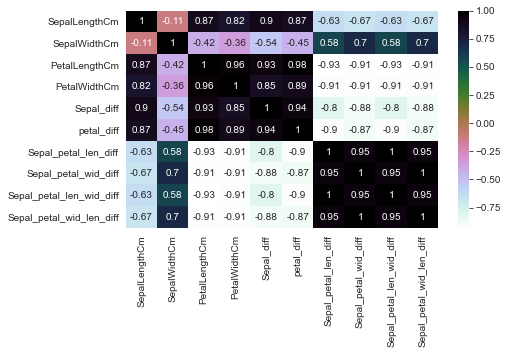

In [20]:
plt.figure(figsize=(7,4)) 
sns.heatmap(Iris_data.corr(),annot=True,cmap='cubehelix_r')

plt.show()

Observation : The Sepal Width and Length are not correlated,  The Petal Width and Lengthare highly correlated

#### Splitting the data into training and test data

In [21]:
X = Iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = Iris_data['Species']

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42)

In [23]:
# splitting the data into validation train and validation test
Xt, Xcv, yt, ycv = train_test_split(Xtrain, ytrain, test_size=0.1, random_state=42)

### Creating a Decision Tree classifier

[Text(125.55000000000001, 201.90857142857143, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(83.7, 170.84571428571428, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(167.4, 170.84571428571428, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(83.7, 139.78285714285715, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(41.85, 108.72, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(125.55000000000001, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(251.10000000000002, 139.78285714285715, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(209.25, 108.72, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(167.4, 77.65714285714284, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(251.10000000000002, 77.65714285714284, 'X[2] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(209.25, 46.59428571428572, 'X[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = 

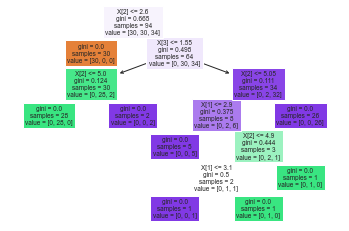

In [24]:
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)

Iris_clf.fit(Xt,yt)

# visualize the tree which is formed on train dataset

tree.plot_tree(Iris_clf,filled=True)

### Visualizing Decision Tree using graphviz

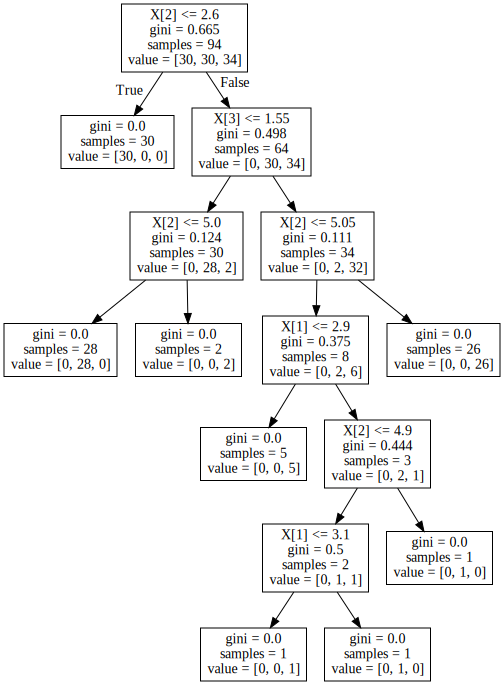

In [25]:
dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

#### Validating the decision tree using cross validation method to get the accuracy or performance score of our model

In [26]:
print('Accuracy score is : ',cross_val_score(Iris_clf, Xt, yt, cv=3, scoring='accuracy').mean())

Accuracy score is :  0.9361559139784946


In [27]:
# Checking validation test data on our trained modeland getting performance metrics

from sklearn.metrics import multilabel_confusion_matrix, plot_confusion_matrix, accuracy_score
y_hat = Iris_clf.predict(Xcv)

print('Accuracy score for validation test data is : ',accuracy_score(ycv,y_hat))
multilabel_confusion_matrix(ycv,y_hat)

Accuracy score for validation test data is :  0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [28]:
# Checking our model performance on actual unseen test data..

yT_hat = Iris_clf.predict(Xtest)
yT_hat

print('Model accuracy score on totally unseen data(Xtest) is :',accuracy_score(ytest, yT_hat)*100,'%')
multilabel_confusion_matrix(ytest,yT_hat)

Model accuracy score on totally unseen data(Xtest) is : 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

### Training model on actual train data...

[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text

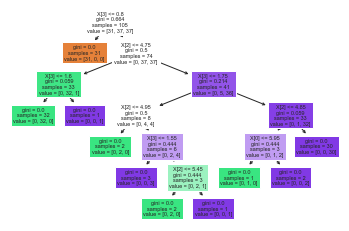

In [29]:
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain,ytrain)

# Visualize tree structure
tree.plot_tree(Iris_Fclf,filled=True)

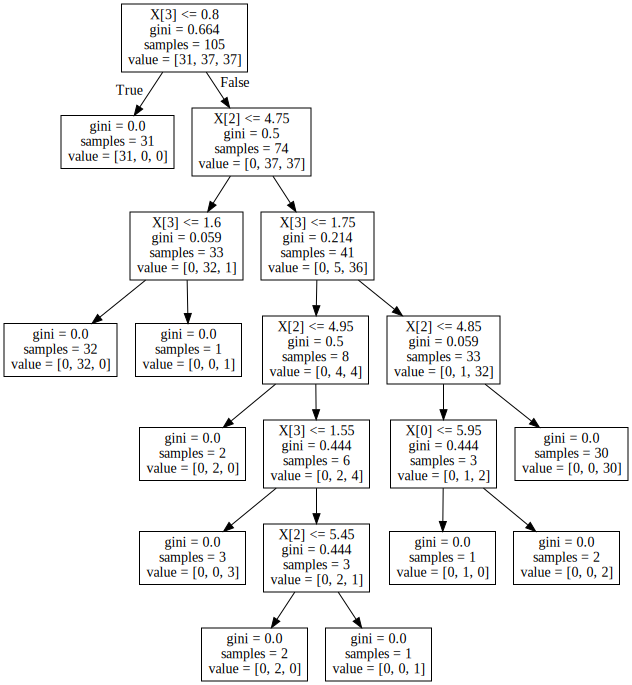

In [30]:
# Final Decision Tree build for deploying in real world cases..
 
dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)

graph

## Checking the performance of model on actual test data 

In [31]:
yT_Fhat = Iris_Fclf.predict(Xtest)
yT_Fhat

print('Model accuracy score on totally unseen Xtest data is : ',accuracy_score(ytest, yT_Fhat)*100,'%')
multilabel_confusion_matrix(ytest, yT_Fhat)

Model accuracy score on totally unseen Xtest data is :  100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)